In [46]:
import pandas as pd
import numpy as np
import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [25]:
#https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering/data

In [65]:
df = pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [67]:
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [68]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [69]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829
unique,22190,3684,3896,NaN,20460,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,14-11-2011 15:27,NaN,NaN,United Kingdom
freq,542,2077,2070,NaN,543,NaN,NaN,361878
mean,NaN,NaN,NaN,12.061303,NaN,3.460471,15287.690570,NaN
std,NaN,NaN,NaN,248.693370,NaN,69.315162,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,5.000000,NaN,1.950000,15152.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16791.000000,NaN


In [70]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [71]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [72]:
#Customer Total amount spend
df['Total_Amount_Spent']= df['Quantity'] * df['UnitPrice']

total_amount = df['Total_Amount_Spent'].groupby(df['CustomerID']).sum()
total_amount = pd.DataFrame(total_amount).reset_index()
total_amount.head()

,CustomerID,Total_Amount_Spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [110]:
df.drop(columns=['Day_of_Week_Name', 'Day_of_Week_Integer'], inplace=True)


In [112]:
# Create additional column 'Day_of_Week_Integer'
df['Day_of_Week_Integer'] = df['InvoiceDate'].dt.dayofweek  # Adding 1 to start from 1 for Sunday

# Create additional column 'Day_of_Week_Name'
#day_names = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
#df['Day_of_Week_Name'] = df['Day_of_Week_Integer'].map(day_names)
df['Day_of_Week'] = df['InvoiceDate'].dt.day_name()

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent,Day_of_Week_Integer,Day_of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,Wednesday


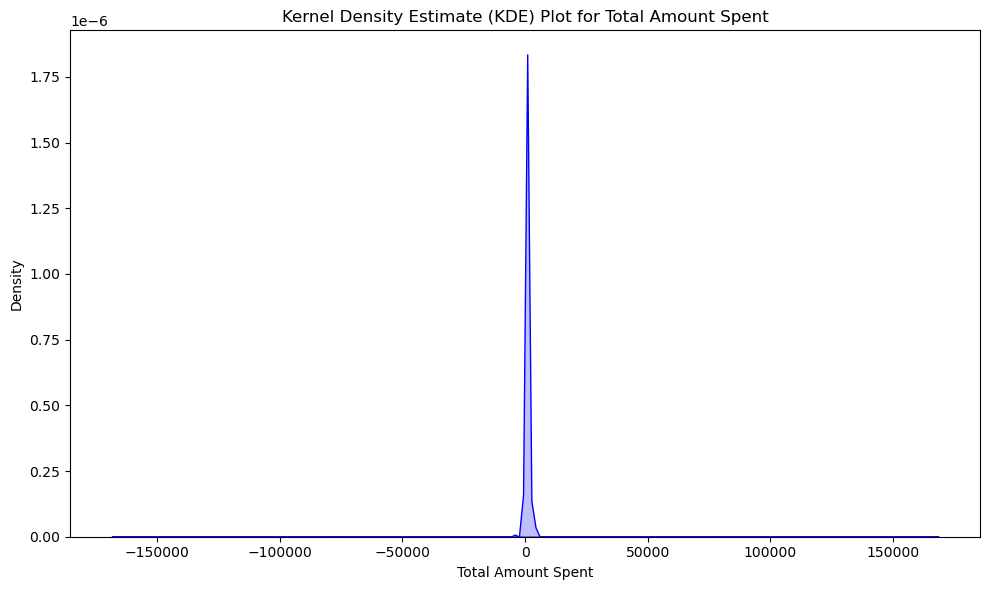

In [113]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Total_Amount_Spent'], shade=True, color='blue')
plt.title('Kernel Density Estimate (KDE) Plot for Total Amount Spent')
plt.xlabel('Total Amount Spent')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

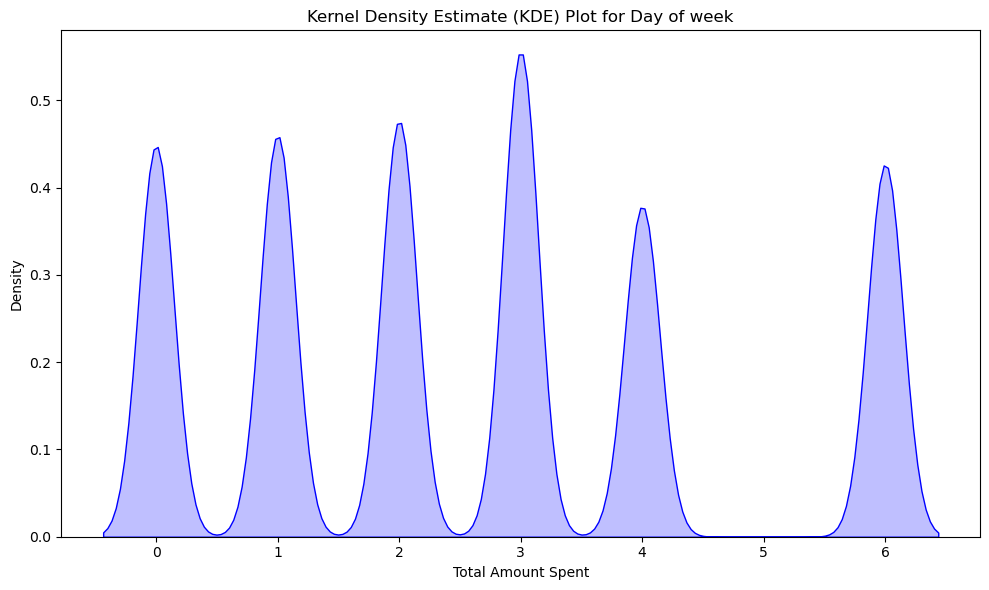

In [114]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['Day_of_Week_Integer'], shade=True, color='blue')
plt.title('Kernel Density Estimate (KDE) Plot for Day of week')
plt.xlabel('Total Amount Spent')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [117]:
distinct_day_of_week = df[['Day_of_Week_Integer', 'Day_of_Week']].drop_duplicates().reset_index(drop=True)
print(distinct_day_of_week)

   Day_of_Week_Integer Day_of_Week
0                    2   Wednesday
1                    3    Thursday
2                    4      Friday
3                    6      Sunday
4                    0      Monday
5                    1     Tuesday


#### observation 1: there was no sale on Saturday, the 5th day of the week

In [118]:
#iris = sns.load_dataset("iris")
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Amount_Spent,Day_of_Week_Integer
count,406829.000000,406829,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,20.401854,2.606402
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.200000,1.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.100000,2.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.500000,4.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,6.000000
std,248.693370,NaN,69.315162,1713.600303,427.591718,1.921907


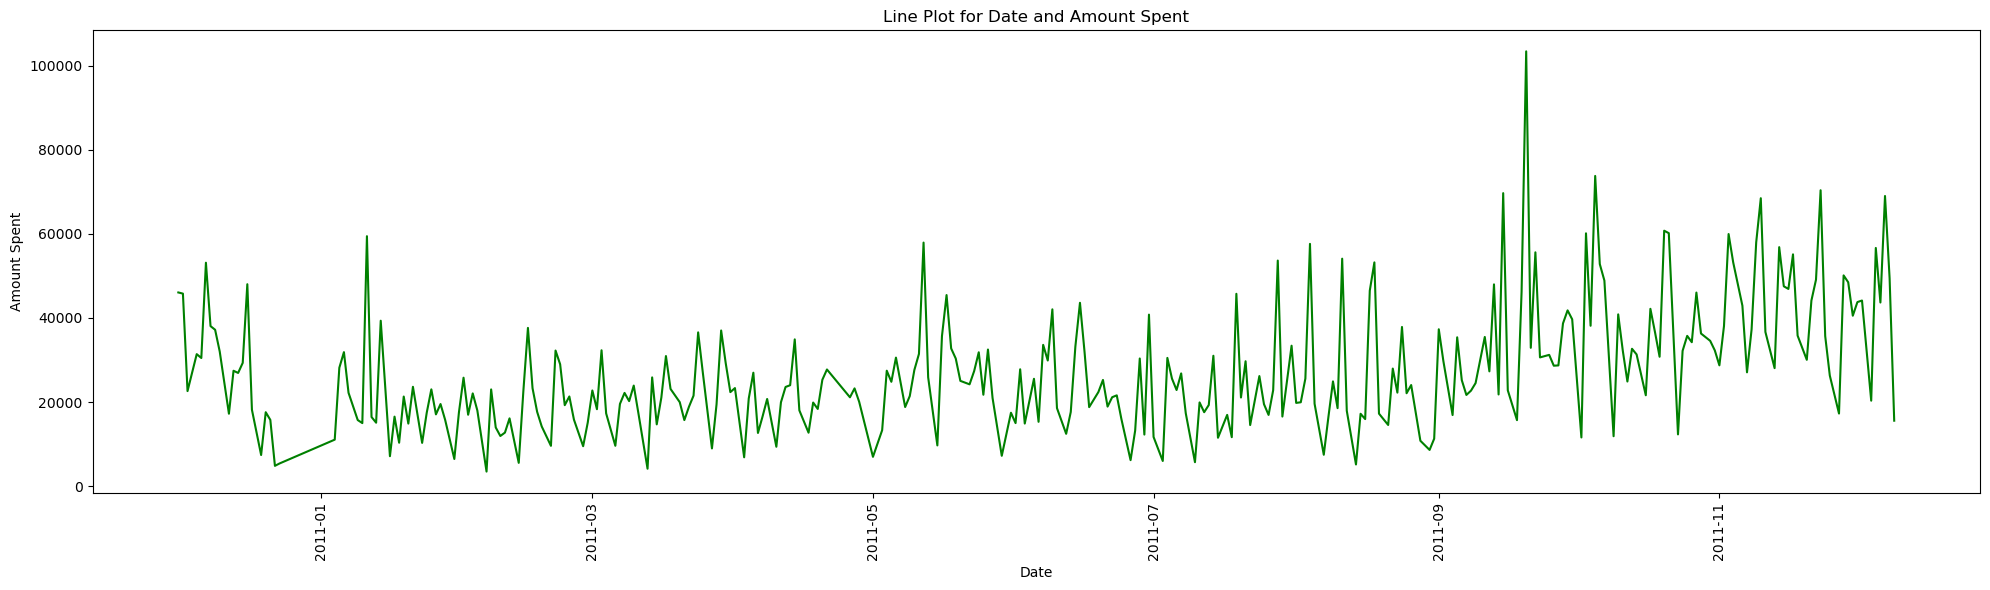

In [89]:
# Line plot for Date and Amount Spent

#Daily_spend = df['Total Amount Spent'].groupby(df['InvoiceDate']).sum()
Daily_spend = df.groupby(df['InvoiceDate'].dt.date)['Total_Amount_Spent'].sum().reset_index()

Daily_spend = pd.DataFrame(Daily_spend).reset_index()
Daily_spend = Daily_spend.sort_values(by='InvoiceDate')

plt.figure(figsize=(20, 6))
#plt.plot(Daily_spend['InvoiceDate'], Daily_spend['Total_Amount_Spent'], marker='o', color='blue', linestyle='-')
plt.plot(Daily_spend['InvoiceDate'], Daily_spend['Total_Amount_Spent'], color='green', linestyle='-')

plt.title('Line Plot for Date and Amount Spent')
plt.xlabel('Date')
plt.ylabel('Amount Spent')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [122]:
Daily_spend.head()
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent,Day_of_Week_Integer,Day_of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,Wednesday


In [124]:
### Country Gorup Spend
total_spending = df['Total_Amount_Spent'].sum()

Country_spend = df['Total_Amount_Spent'].groupby(df['Country']).sum()
Country_spend = pd.DataFrame(Country_spend).reset_index()

Country_spend['Percent_spend'] = ((Country_spend['Total_Amount_Spent'] / total_spending) * 100).round(2).astype(str) + '%'
#Country_spend = pd.DataFrame(Country_spend, Percent_spend).reset_index()

Country_spend.head()

,Country,Total_Amount_Spent,Percent_spend
0,Australia,137077.27,1.65%
1,Austria,10154.32,0.12%
2,Bahrain,548.40,0.01%
3,Belgium,40910.96,0.49%
4,Brazil,1143.60,0.01%


In [41]:
Country_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             37 non-null     object 
 1   Total Amount Spent  37 non-null     float64
 2   Percent_spend       37 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1020.0+ bytes


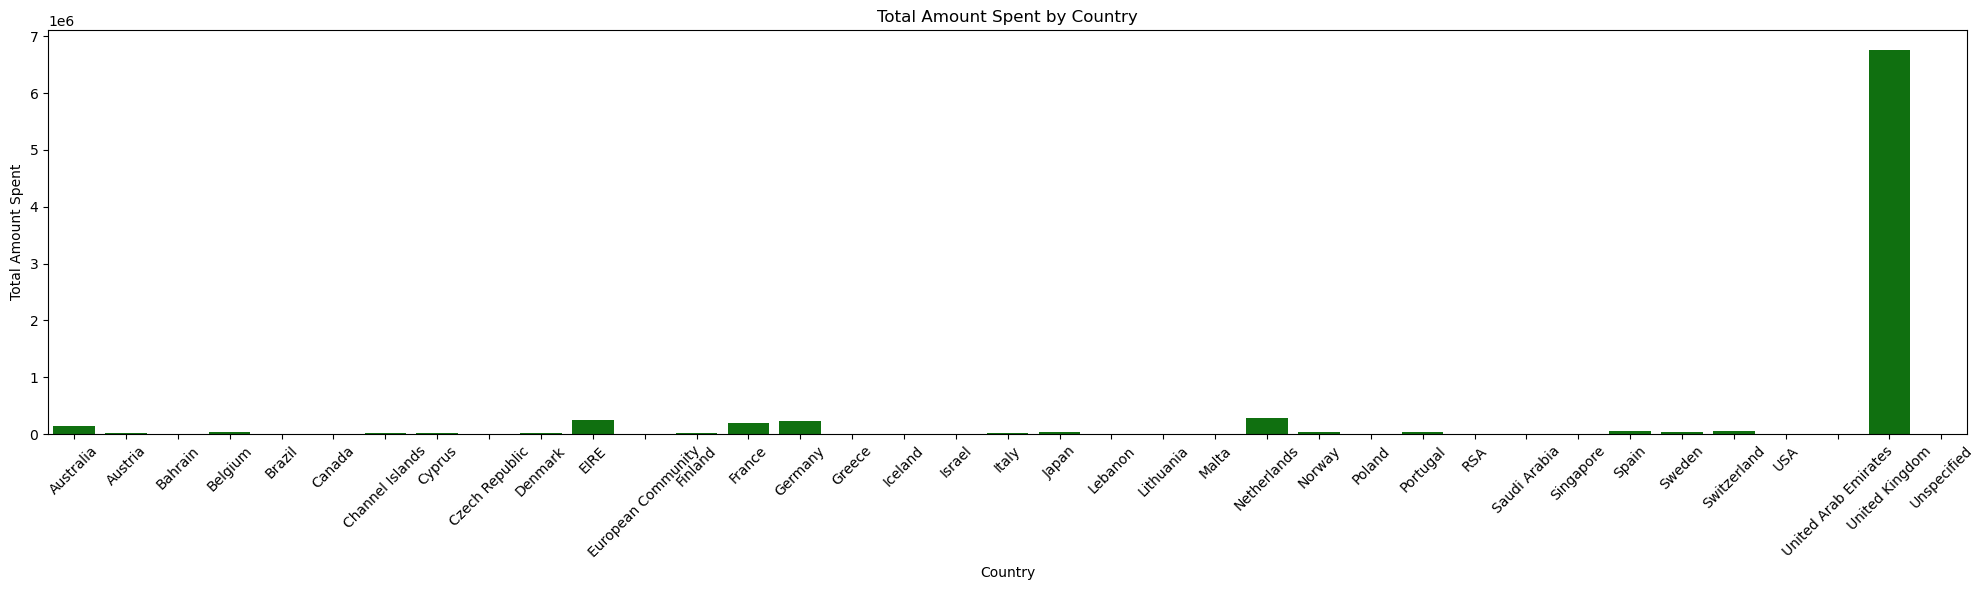

In [126]:
# Scatter plot
plt.figure(figsize=(20, 6))
sns.barplot(data=Country_spend, x='Country', y='Total_Amount_Spent', color='green')
#sns.barplot(data=Country_spend, x='Country', y='Percent_spend', color='green')

plt.title('Total Amount Spent by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Amount Spent')
plt.tight_layout()
plt.show()


In [127]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent,Day_of_Week_Integer,Day_of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,Wednesday


In [130]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent,Day_of_Week_Integer,Day_of_Week
count,406829,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829,406829.000000,406829.000000,406829
unique,22190,3684,3896,NaN,NaN,NaN,NaN,37,NaN,NaN,6
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN,Thursday
freq,542,2077,2070,NaN,NaN,NaN,NaN,361878,NaN,NaN,82374
mean,NaN,NaN,NaN,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,NaN,20.401854,2.606402,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN,-168469.600000,0.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,NaN,4.200000,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,NaN,11.100000,2.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,NaN,19.500000,4.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN,168469.600000,6.000000,NaN


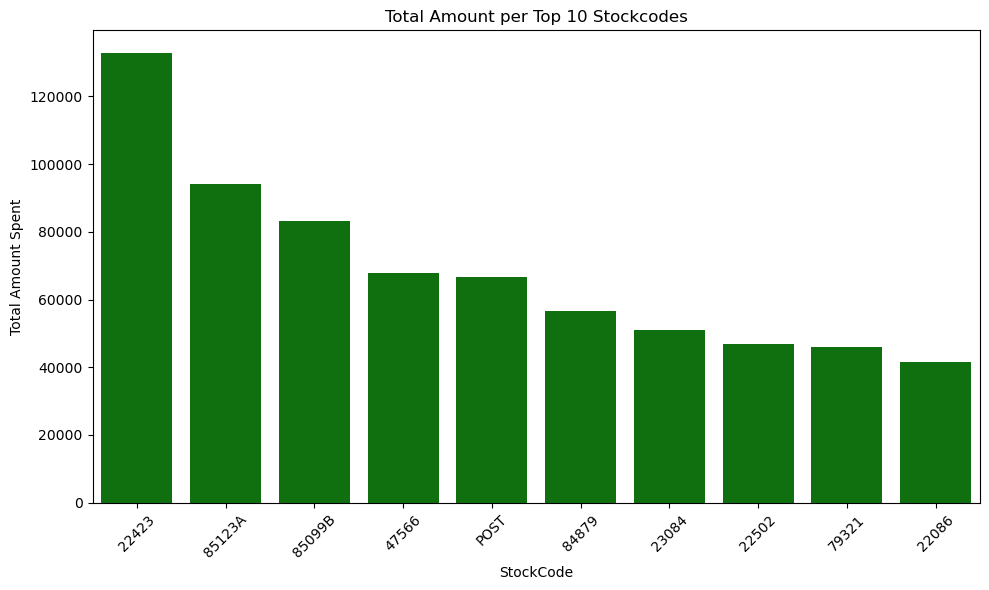

In [136]:
# Sort the dataframe by 'Total_Amount_Spent' in descending order and select top 10
top_10_stock_codes = df.groupby('StockCode')['Total_Amount_Spent'].sum().nlargest(10).reset_index()
#top_10_stock_codes = df.groupby('Description')['Total_Amount_Spent'].sum().nlargest(5).reset_index()

# Bar plot for top 10 stock codes
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_stock_codes, x='StockCode', y='Total_Amount_Spent', color='green')

#sns.barplot(data=top_10_stock_codes, x='Description', y='Total_Amount_Spent', color='green')
plt.title('Total Amount per Top 10 Stockcodes')
plt.xlabel('StockCode')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
print((df[df['StockCode'] == '22423']['Description']).unique())


['REGENCY CAKESTAND 3 TIER']


##### The Most bought Item is Regency Cakestand 3 Tier stand

#### Clustering